In [1]:
from os.path import join
import numpy as np
from numpy.linalg import svd
from scipy.io import loadmat
from sklearn.datasets import load_iris 

import matplotlib.pyplot as plt
plt.rcParams['font.size'] = 18

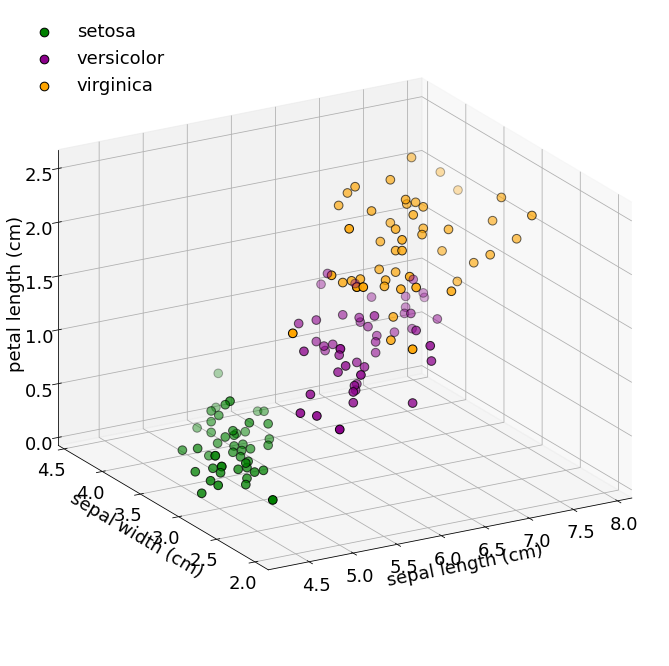

In [2]:
# Figure 5.1

# Fischer iris dataset (built into sklearn).
meas = load_iris()['data']

xs = [meas[:50, :], meas[50:100, :], meas[100:, :]]
labels = ['setosa', 'versicolor', 'virginica']
colors = ['green', 'darkmagenta', 'orange']

fig, ax = plt.subplots(subplot_kw=dict(projection='3d', proj_type='ortho'), figsize=(12, 12))

for x, label, color in zip(xs, labels, colors):
    ax.scatter(
        x[:, 0], x[:, 1], x[:, 3],
        label=label, color=color,
        marker='o', sizes=[75], edgecolors='black'
    )
ax.view_init(20, 240)
ax.set_xlabel('sepal length (cm)')
ax.set_ylabel('sepal width (cm)')
ax.set_zlabel('petal length (cm)')
ax.legend(loc='upper left', frameon=False);

In [3]:
dog = loadmat(join('..', 'DATA', 'dogData.mat'))['dog']
cat = loadmat(join('..', 'DATA', 'catData.mat'))['cat']

dog_wave = loadmat(join('..', 'DATA', 'dogData_w.mat'))['dog_wave']
cat_wave = loadmat(join('..', 'DATA', 'catData_w.mat'))['cat_wave']

dog_cat_r = np.hstack([dog, cat])
dog_cat_w = np.hstack([dog_wave, cat_wave])

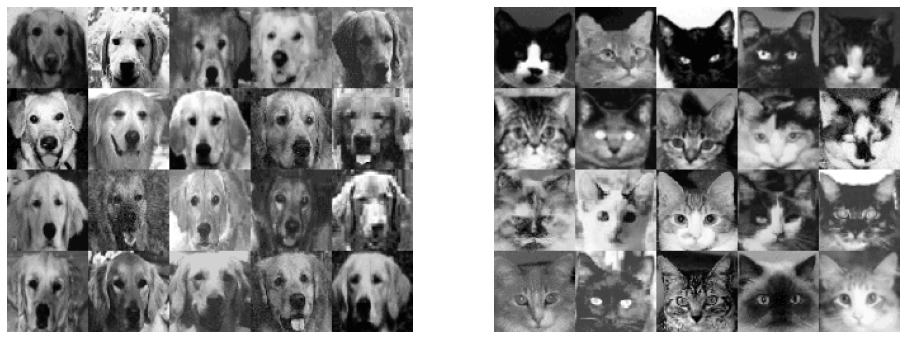

In [4]:
# Figure 5.2
def mosaic(images, ncols=5, nrows=4):
    nz, ny, nx = images.shape
    montage = np.full((ny*nrows, nx*ncols), np.nan)
    for i, image in enumerate(images[:ncols*nrows]):
        x, y = (i % ncols) * nx, (i // ncols) * ny
        montage[y:y+ny, x:x+nx] = image    
    return montage

def as_image_list(dataset, ny=64, nx=64):
    return np.transpose(
        np.rot90(np.reshape(dataset, (ny, nx, -1)), -1),
        (2, 0, 1)
    )

fig, axs = plt.subplots(1, 2, figsize=(16, 6))
for ax, animal in zip(axs, [dog[:, :20], cat[:, :20]]):
    ax.imshow(mosaic(as_image_list(animal)), cmap='gray')
    ax.axis(False)

In [5]:
U_r, S_r, VT_r = svd(dog_cat_r - dog_cat_r.mean(), full_matrices=False)

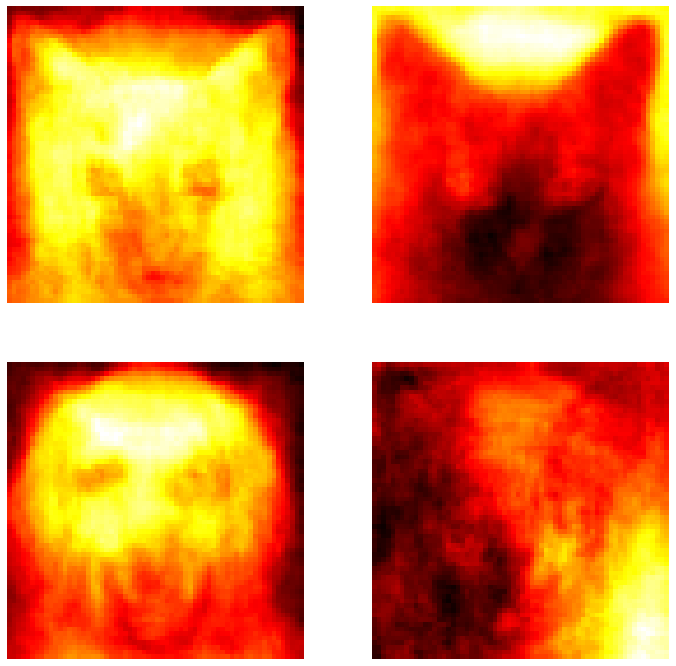

In [6]:
# Figure 5.3
fig, axs = plt.subplots(2, 2, figsize=(12, 12))
for ax, col in zip(axs.flat, U_r.T):
    ax.imshow(
        np.rot90(np.reshape(col, (64, 64)), -1),
        cmap='hot'
    )
    ax.axis(False)

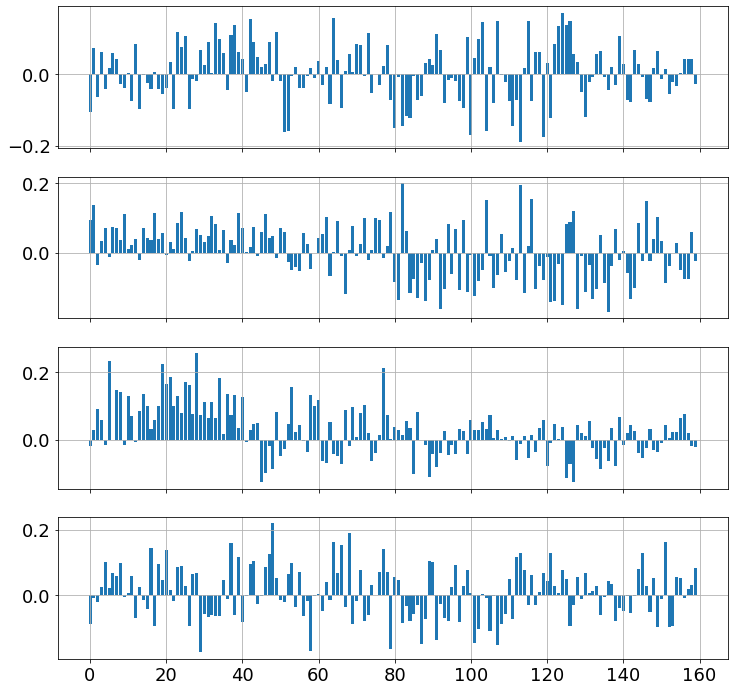

In [7]:
fig, axs = plt.subplots(4, 1, sharex=True, figsize=(12, 12))
for ax, col in zip(axs, VT_r):
    ax.bar(range(len(col)), col)
    ax.grid(True)

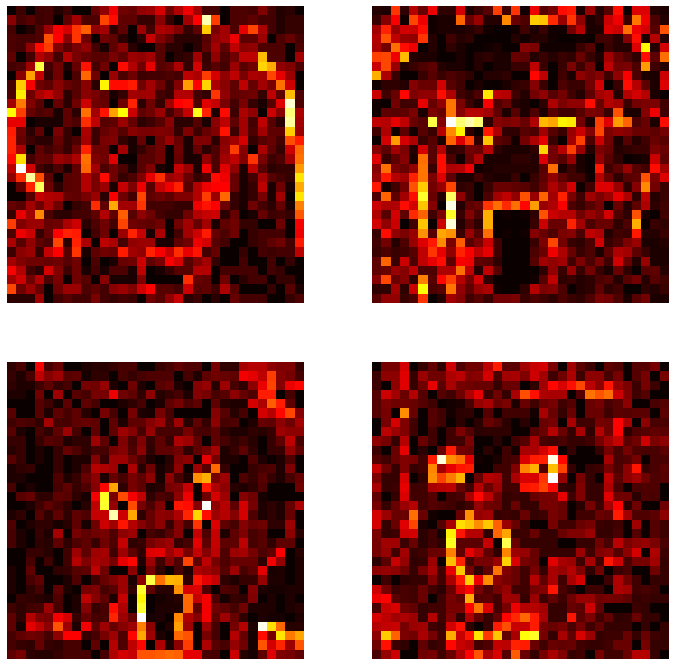

In [8]:
fig, axs = plt.subplots(2, 2, figsize=(12, 12))
for ax, dog_wave_col in zip(axs.flat, dog_wave.T):
    ax.imshow(
        np.rot90(np.reshape(dog_wave_col, (32, 32)), -1),
        cmap='hot'
    )
    ax.axis(False)

In [9]:
U_w, S_w, VT_w = svd(dog_cat_w - dog_cat_w.mean(), full_matrices=False)

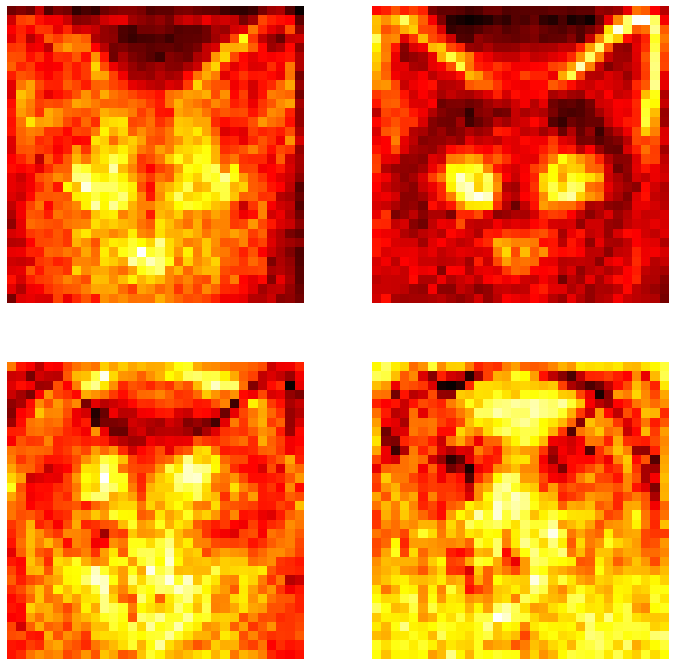

In [10]:
# Figure 5.4
fig, axs = plt.subplots(2, 2, figsize=(12, 12))
for ax, col in zip(axs.flat, U_w.T):
    ax.imshow(
        np.rot90(np.reshape(col, (32, 32)), -1),
        cmap='hot'
    )
    ax.axis(False)

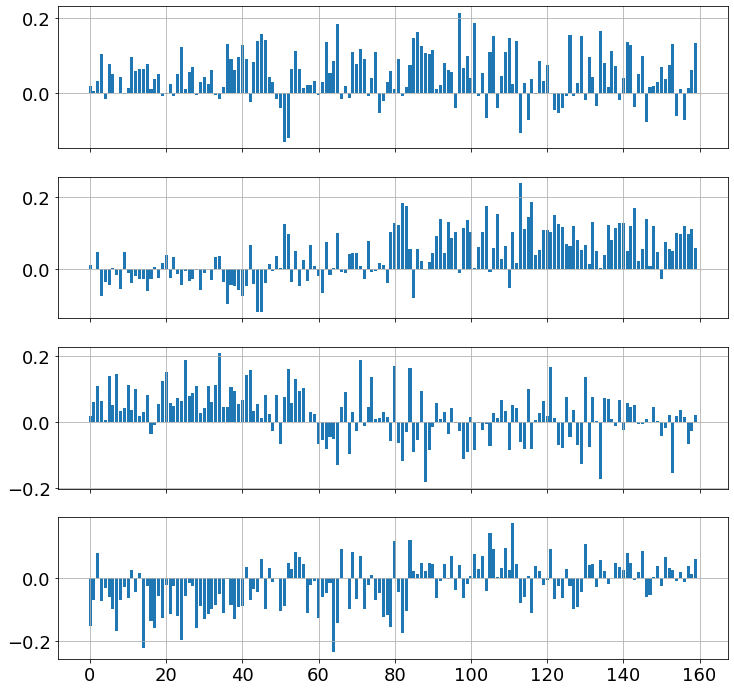

In [11]:
fig, axs = plt.subplots(4, 1, sharex=True, figsize=(12, 12))
for ax, col in zip(axs, VT_w):
    ax.bar(range(len(col)), col)
    ax.grid(True)

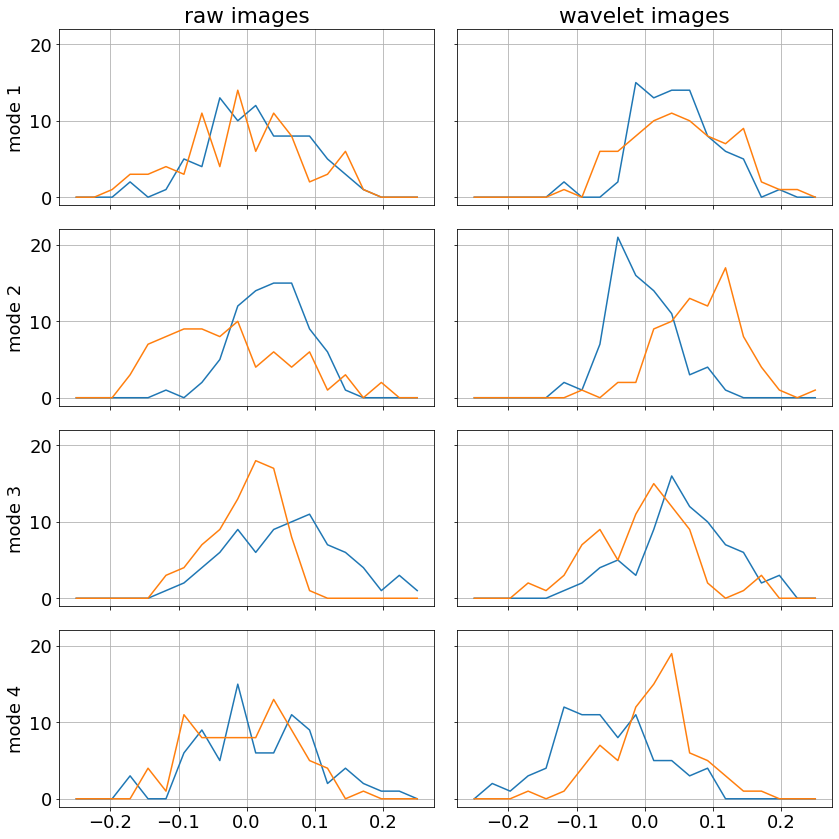

In [12]:
# Figure 5.5

xbin = np.linspace(-0.25, 0.25, 20)
xbin_edges = np.append(
    xbin,
    xbin[-1] + (xbin[1] - xbin[0])
) - (xbin[1] - xbin[0]) / 2

fig, axs = plt.subplots(4, 2, sharex=True, sharey=True, figsize=(12, 12))
for j in range(4):
    pdf1 = np.histogram(VT_r[j, :80], bins=xbin_edges)[0]
    pdf2 = np.histogram(VT_r[j, 80:], bins=xbin_edges)[0]
    axs[j, 0].plot(xbin, pdf1)
    axs[j, 0].plot(xbin, pdf2)
    axs[j, 0].grid(True)
    axs[j, 0].set_ylabel(f'mode {j+1}')
    pdf1 = np.histogram(VT_w[j, :80], bins=xbin_edges)[0]
    pdf2 = np.histogram(VT_w[j, 80:], bins=xbin_edges)[0]
    axs[j, 1].plot(xbin, pdf1)
    axs[j, 1].plot(xbin, pdf2)
    axs[j, 1].grid(True)

axs[0, 0].set_title('raw images')
axs[0, 1].set_title('wavelet images')
plt.tight_layout()

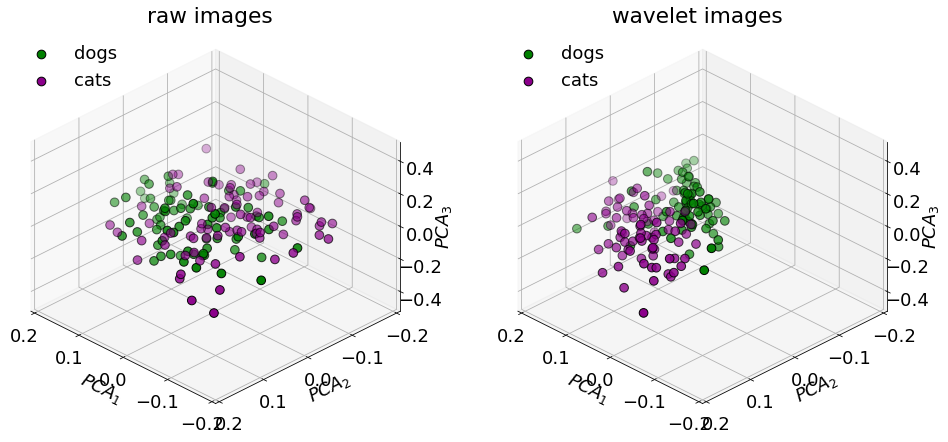

In [13]:
# Figure 5.6

fig, axs = plt.subplots(1, 2, subplot_kw=dict(projection='3d', proj_type='ortho'), figsize=(16, 8))

for ax, VT, title in zip(axs, [VT_r, VT_w], ['raw images', 'wavelet images']):
    # First three PCA modes as X, Y, Z
    ax.scatter(
        *VT[:3, :80],
        label='dogs', color='green',
        marker='o', sizes=[75], edgecolors='black'
    )
    ax.scatter(
        *VT[:3, 80:],
        label='cats', color='darkmagenta',
        marker='o', sizes=[75], edgecolors='black'
    )
    ax.set_xlabel('$PCA_1$')
    ax.set_ylabel('$PCA_2$')
    ax.set_zlabel('$PCA_3$')
    ax.legend(loc='upper left', frameon=False)
    ax.set_xlim((-0.2, 0.2))
    ax.set_ylim((-0.2, 0.2))
    ax.set_zlim((-0.5, 0.5))
    ax.view_init(30, 135)
    ax.set_title(title)